### Task 5 Exploratory Data Analysis
#### Submitted By Shubham HIngu.

#### importing all the required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Reading the data using Pandas library.

In [44]:
data=pd.read_csv('SampleSuperstore.csv')

In [3]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
data['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

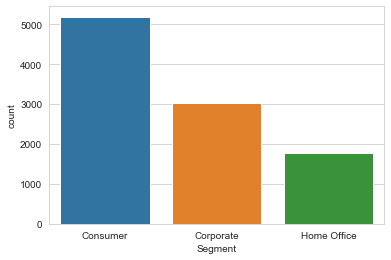

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='Segment',data=data)

In [7]:
print("Total No of cities:",len(data['City'].unique()))

Total No of cities: 531


In [8]:
from plotly import __version__

In [9]:
print(__version__)

4.6.0


In [10]:
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [40]:
import pyttsx3  
engine = pyttsx3.init()

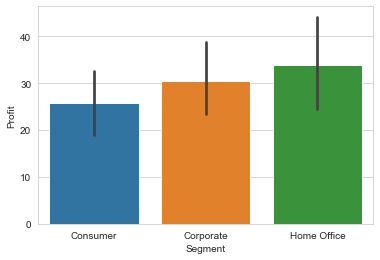

In [12]:
sns.barplot(x='Segment',y='Profit',data=data)

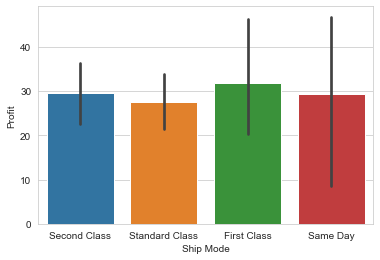

In [13]:
sns.barplot(x='Ship Mode',y='Profit',data=data)

In [14]:
data.describe()['Profit']

count    9994.000000
mean       28.656896
std       234.260108
min     -6599.978000
25%         1.728750
50%         8.666500
75%        29.364000
max      8399.976000
Name: Profit, dtype: float64

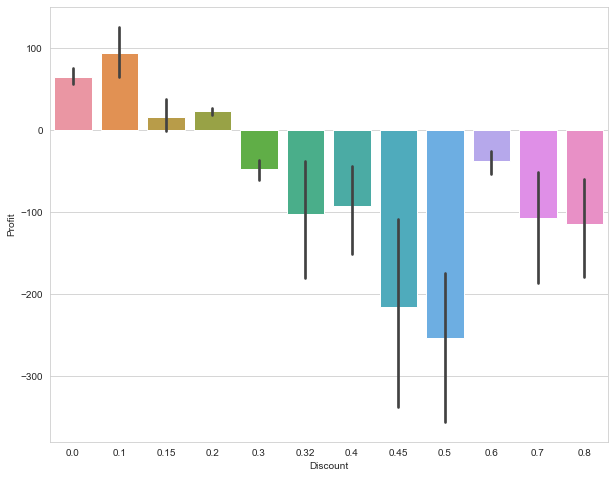

In [15]:
plt.figure(figsize=(10,8))
sns.barplot(x='Discount',y='Profit',data=data[data['Segment']=='Consumer'])

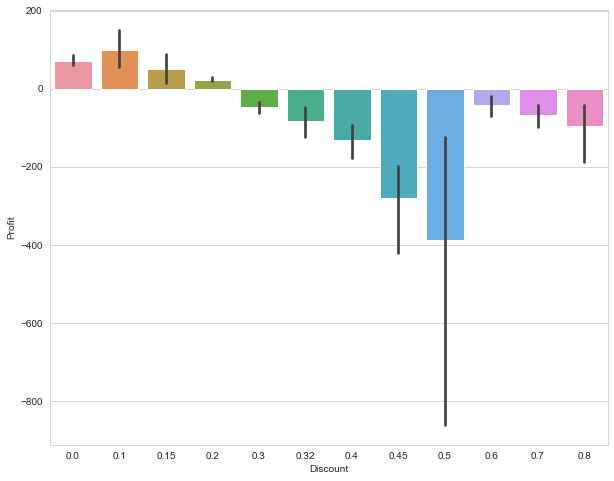

In [16]:
plt.figure(figsize=(10,8))
sns.barplot(x='Discount',y='Profit',data=data[data['Segment']=='Corporate'])

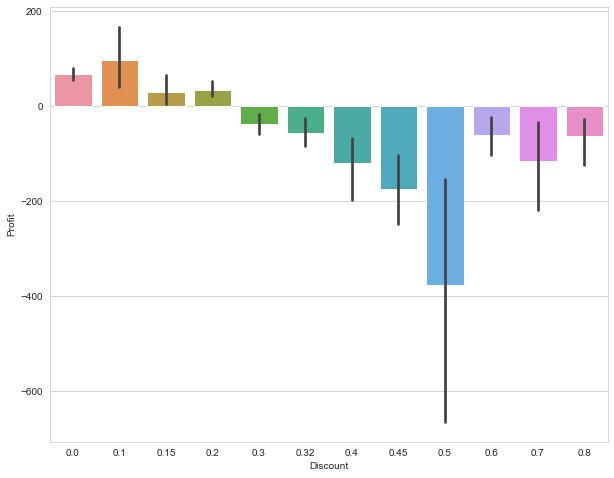

In [17]:
plt.figure(figsize=(10,8))
sns.barplot(x='Discount',y='Profit',data=data[data['Segment']=='Home Office'])

##### From the above three barplots it can be inferred that the products that have 10% Discount on it helps to gain more profit than the product with No Discount and the products with 50% Discount are Dipping the Profit level very much for all the three Segments.

In [54]:
engine.say("From the above three barplots it can be inferred that the products that have 10% Discount on it helps to gain more profit than the product with No Discount and the products with 50% Discount are Dipping the Profit level very much for all the three Segments.")
engine.runAndWait()

In [18]:
data['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

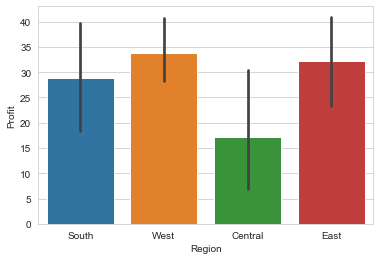

In [19]:
sns.barplot(x='Region',y='Profit',data=data)

#### From the above plot we can say that Central region has less profit as compared to other three regions

In [20]:
#data.iplot(x='Sub-Category',y='Profit',kind='bar')

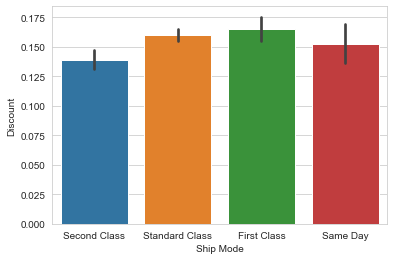

In [21]:
sns.barplot(x='Ship Mode',y='Discount',data=data)

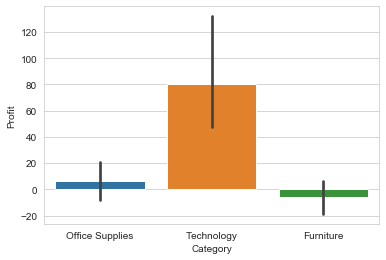

In [22]:
sns.barplot(data=data[data['Region']=='Central'],x='Category',y='Profit')

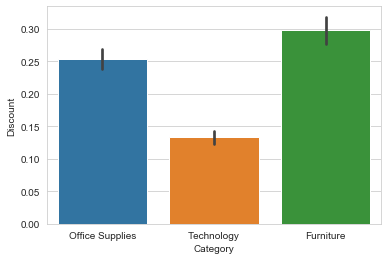

In [23]:
sns.barplot(data=data[data['Region']=='Central'],x='Category',y='Discount')

#### From the above graphs we come to know that profit is very low incase of the Office Supplies and Furniture categories in the Central Region as in second graph we see that the dicount given on Office supplies and Furniture categories is much more that is approx 30 % to 35% in case of Furniture and 25% - 27% in case of Office Supplies.
### So to increase profit in the Central  Region we would have to reduce the Discount percentages on the Office supplies and Furniture.

In [55]:
engine.say("From the above graphs we come to know that profit is very low incase of the Office Supplies and Furniture categories in the Central Region as in second graph we see that the dicount given on Office supplies and Furniture categories is much more that is approx 30 % to 35% in case of Furniture and 25% - 27% in case of Office Supplies.")
engine.runAndWait()

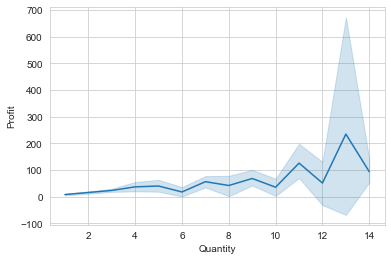

In [37]:
sns.lineplot(x='Quantity',y='Profit',data=data)

#### The relationship is almost linear between the quantity of items purchased and the profit but when it comes to 12 - 14 items then the profit margin has significant rise.

In [56]:
engine.say("The relationship is almost linear between the quantity of items purchased and the profit but when it comes to 12 - 14 items then the profit margin has significant rise.")
engine.runAndWait()

In [25]:
data.duplicated().sum()

17

In [26]:
data.drop_duplicates(keep='first',inplace=True)

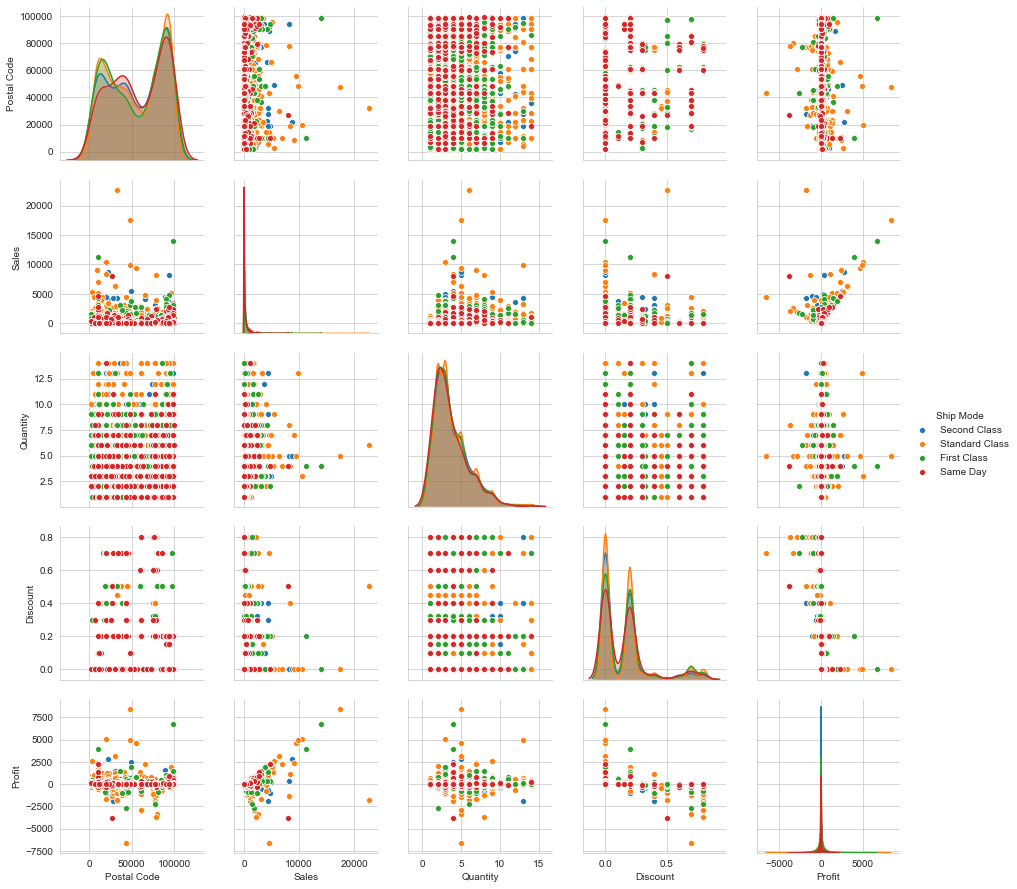

In [27]:
sns.pairplot(data,hue='Ship Mode')

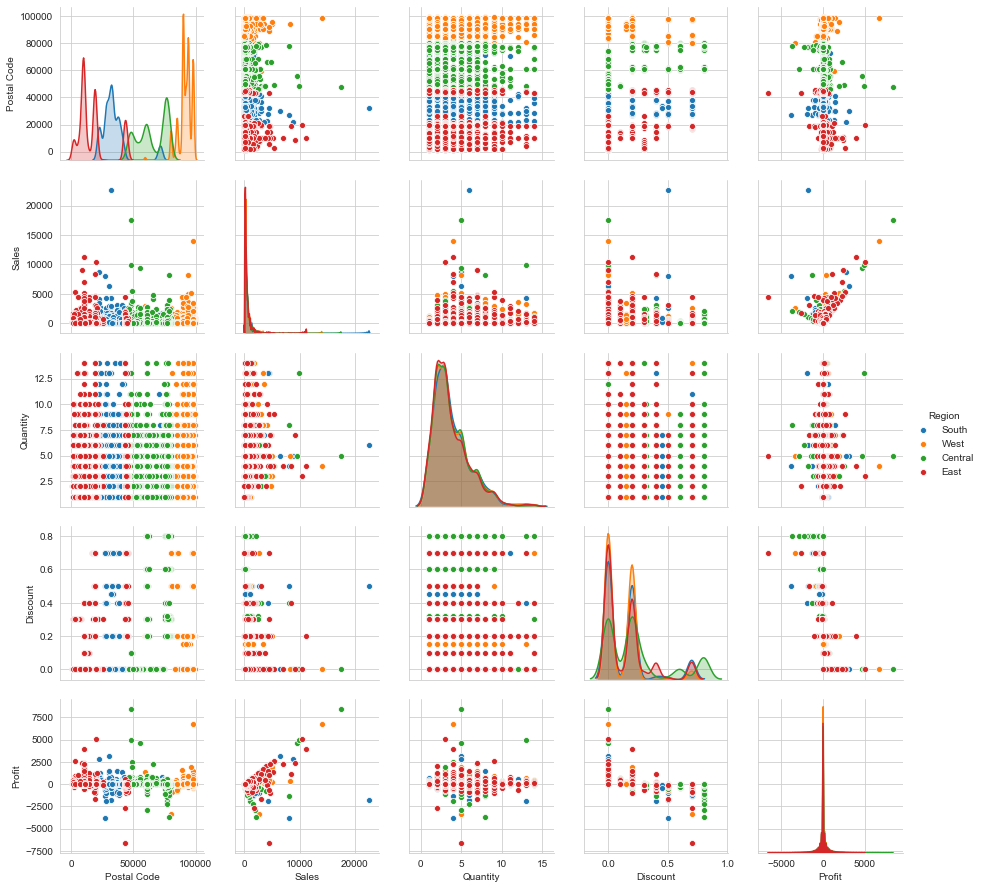

In [28]:
sns.pairplot(data,hue='Region')

In [29]:
data.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023476,0.013110,0.059225,-0.029892
Sales,-0.023476,1.000000,0.200722,-0.028311,0.479067
Quantity,0.013110,0.200722,1.000000,0.008678,0.066211
Discount,0.059225,-0.028311,0.008678,1.000000,-0.219662
Profit,-0.029892,0.479067,0.066211,-0.219662,1.000000


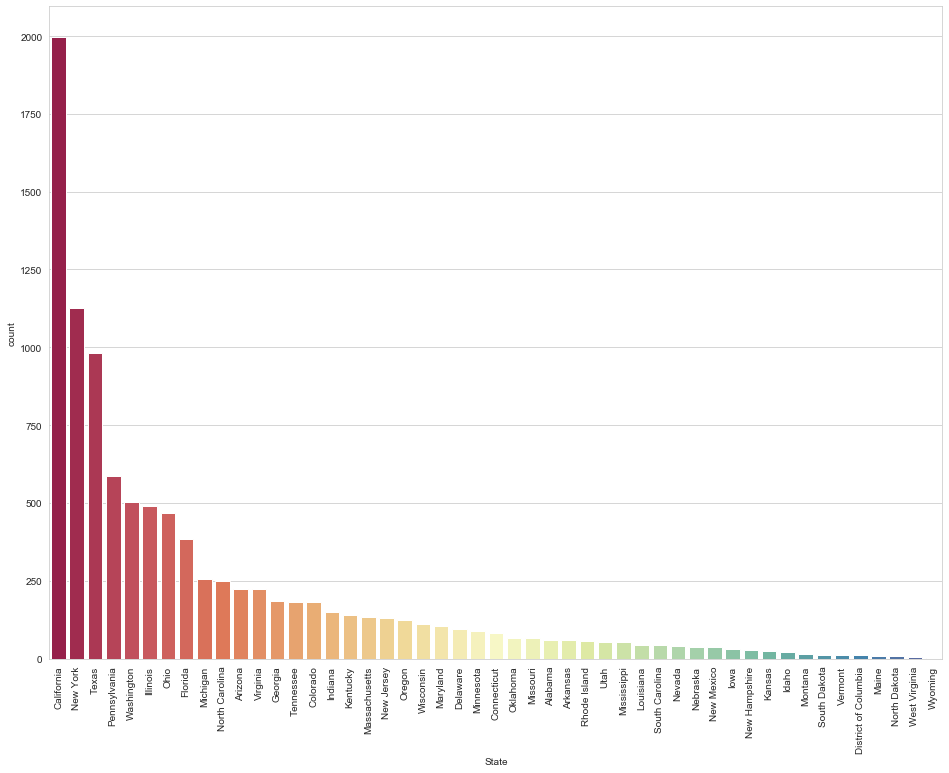

In [30]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=90,fontsize=10);
sns.countplot(x=data['State'],order=(data['State'].value_counts().head(100)).index,palette='Spectral')

#### if we consider the first 100 rows in our data then we come to know that California is the state from which there are maximum no of customers followed by New York and so on.

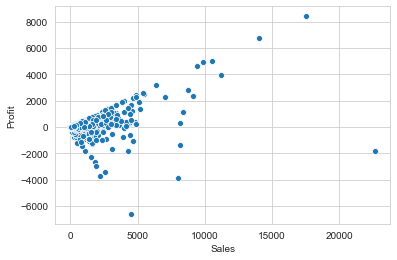

In [31]:
sns.scatterplot(x='Sales',y='Profit',data=data)

From the above graph we come to know that There is not a much relation between sales and Profit.

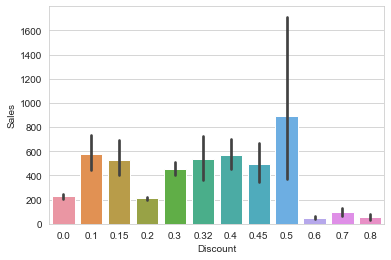

In [32]:
sns.barplot(x='Discount',y='Sales',data=data)

#### From the above plot it can be inferred that the products with 50% Discount have more sales as compared to items with more or less discount.

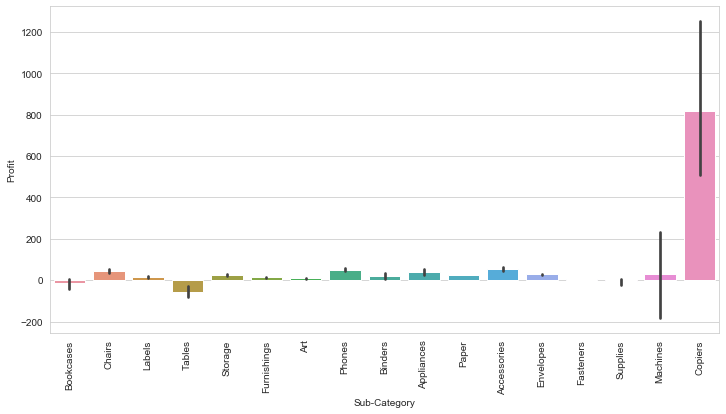

In [33]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90,fontsize=10);
sns.barplot(x='Sub-Category',y='Profit',data=data)

Here we infer that the maximum profit is being earned from the copiers

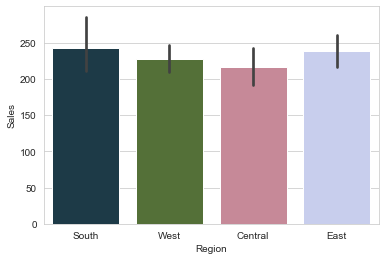

In [34]:
sns.barplot(x='Region',y='Sales',data=data,palette='cubehelix')

Sales in all the region are Good as none of the region have their graphs dipping or rising significantly than others. 

So there are some places where we can increase profits on the items by giving customers offers.